# 第14回 データの読み方

___
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tsuboshun/begin-python/blob/gh-pages/_sources/workbook/lecture14.ipynb)

___

## この授業で学ぶこと

準備中

## データの種類

データ分析を行うにあたって、どのような種類のデータを扱っているかを意識することが重要である。
この節では、データの大まかな分類について説明する。

まず、データは大まかに質的変数と量的変数に分けられる。
質的変数はさらに名義尺度と順序尺度に分類され、量的変数はさらに間隔尺度と比例尺度に分類される。

| 種類 | 尺度 | 概要 | 例 |
| --- | --- | --- | --- |
| 質的変数 | 名義尺度 | 分類のための尺度。順番にも間隔にも意味がない。 | 性別、血液型  |
| 質的変数 | 順序尺度 | 分類のための尺度。順番に意味があるが、間隔に意味がない。 | 5段階評価 |
| 量的変数 | 間隔尺度 | 量を表す尺度。順序にも間隔にも意味があるが、比率に意味がない。| 温度、西暦 |
| 量的変数 | 比例尺度 | 量を表す尺度。順序・間隔・比率に意味がある。 | 金額、重さ |

それぞれの尺度の概要は、上の表の通りである。例をもとに具体的に説明しよう。

名義尺度の例として、性別が挙げられる。
例えば男性を0、女性を1としてデータを集計したとして、この0と1という数値の順番にも間隔にも意味はない。

順序尺度の例として、5段階評価が挙げられる。
例えば顧客の満足度を1から5の整数で表してデータを集計したとして、これらの数値の順序には意味があるが、間隔には意味がない。
評価5は大満足、評価4は満足を表すのであって、大満足と満足の差を数値で表すことはできない。

間隔尺度の例として、温度（℃）が挙げられる。
温度は順序にも間隔にも意味がある。しかし、0℃は人間が適当に決めた基準であって、それ以下がないという意味の絶対的な0度ではない。したがって、30℃は15℃の2倍という主張にあまり意味がない。実際、華氏（℉）に直すと30℃は86℉、15℃は59℉であり、0度の基準が異なれば、先ほどの主張が成立しなくなる。

比例尺度の例として、金額が挙げられる。金額は順序・間隔・比率に意味がある。例えば、100円玉を5枚集めると500円になるので、500円は100円の5倍という主張は正しい。

## データの分布と代表値

In [1]:
#pip install japanize_matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import japanize_matplotlib

In [3]:
sample_data = np.random.normal(
    loc   = 10,        # 平均
    scale = 2,         # 標準偏差
    size  = 1000,   # 配列のサイズ
)

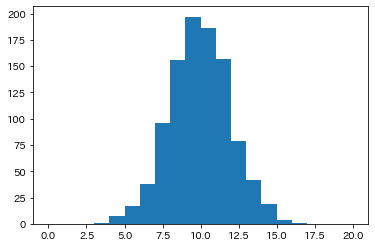

In [4]:
# プロットの入れ物の用意
fig, ax = plt.subplots()

# データの用意
x = sample_data

# ヒストグラムのプロット
ax.hist(x, bins=20, range=(0, 20))

# 表示
plt.show()

In [5]:
df_diamond = sns.load_dataset('diamonds')

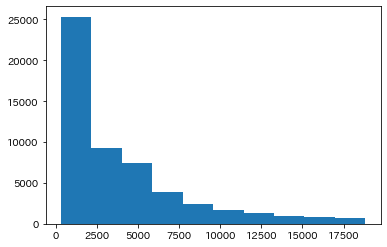

In [6]:
# プロットの入れ物の用意
fig, ax = plt.subplots()

# データの用意
x = df_diamond["price"].values

# ヒストグラムのプロット
ax.hist(x)

# 表示
plt.show()

## 層別分析

In [7]:
df_titanic = sns.load_dataset('titanic')

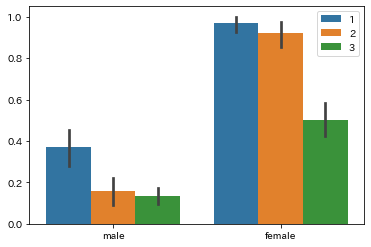

In [8]:
# プロットの入れ物の用意
fig, ax = plt.subplots()

# データの用意
x = df_titanic["sex"].values
y = df_titanic["survived"].values
hue = df_titanic["pclass"].values

# 棒グラフのプロット
sns.barplot(x=x, y=y, hue=hue, hue_order=[1, 2, 3], ax=ax)

# 表示
plt.show()

## 相関と因果

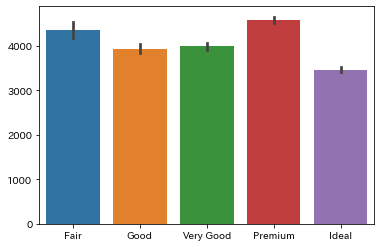

In [9]:
# プロットの入れ物の用意
fig, ax = plt.subplots()

# データの用意
x = df_diamond["cut"].values
y = df_diamond["price"].values

# 棒グラフのプロット
sns.barplot(x=x, y=y, order=["Fair", "Good", "Very Good", "Premium", "Ideal"], ax=ax)

# 表示
plt.show()

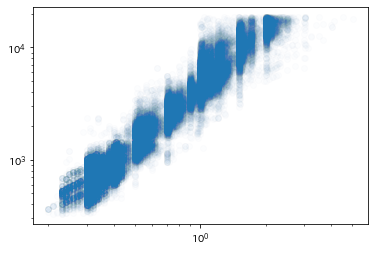

In [10]:
# プロットの入れ物の用意
fig, ax = plt.subplots()

# データの用意
x = df_diamond["carat"]
y = df_diamond["price"]

# 散布図
ax.scatter(x, y, alpha=0.01)

# 軸の設定（対数スケール）
ax.set_xscale('log')
ax.set_yscale('log')

# 表示
plt.show()

In [11]:
df_diamond["price_log"] = np.log(df_diamond["price"])
df_diamond["carat_log"] = np.log(df_diamond["carat"])

In [12]:
from sklearn.linear_model import LinearRegression

# データの用意
x = df_diamond[["carat_log"]].values
y = df_diamond["price_log"].values

# 線型回帰モデルの用意
lr = LinearRegression()

# モデルのパラメータのフィッティング
lr.fit(x, y)

# 予測の残差
df_diamond["residual"] = y - lr.predict(x)

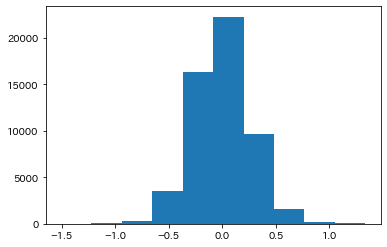

In [13]:
# プロットの入れ物の用意
fig, ax = plt.subplots()

# データの用意
x = df_diamond["residual"].values

# ヒストグラムのプロット
ax.hist(x)

# 表示
plt.show()

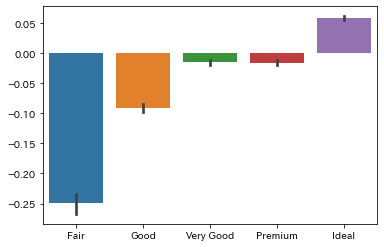

In [14]:
# プロットの入れ物の用意
fig, ax = plt.subplots()

# データの用意
x = df_diamond["cut"].values
y = df_diamond["residual"].values

# 棒グラフのプロット
sns.barplot(x=x, y=y, order=["Fair", "Good", "Very Good", "Premium", "Ideal"])

# 表示
plt.show()